In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ironman_data_tahoe.csv')

df.head()

,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Total min,Overall Rank,Swim Time,Swim min,Swim Rank,Bike Time,Bike min,Bike Rank,Run Time,Run min,Run Rank,Finish Status
0,37,Gregory Lindquist,United States,Male,M30-34,1,9:39:23,579.38,1,0:57:18,57.30,71,5:09:52,309.87,7,3:24:02,204.03,3,Finisher
1,1446,Ryan Linden,United States,Male,M30-34,2,9:39:52,579.87,2,0:54:13,54.22,30,5:23:09,323.15,42,3:10:54,190.90,1,Finisher
2,93,Jason Jacobs,United States,Male,M30-34,3,9:43:30,583.50,3,0:55:56,55.93,42,5:13:43,313.72,14,3:25:30,205.50,5,Finisher
3,52,Dean Discher,United States,Male,M45-49,1,9:46:56,586.93,4,1:04:24,64.40,245,5:04:36,304.60,4,3:26:54,206.90,6,Finisher
4,67,Bj Christenson,United States,Male,M35-39,1,9:49:25,589.42,5,0:51:37,51.62,16,5:22:27,322.45,38,3:28:31,208.52,8,Finisher


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bib            974 non-null    int64  
 1   Name           974 non-null    object 
 2   Country        974 non-null    object 
 3   Gender         971 non-null    object 
 4   Division       974 non-null    object 
 5   Division Rank  974 non-null    int64  
 6   Overall Time   974 non-null    object 
 7   Total min      974 non-null    float64
 8   Overall Rank   974 non-null    int64  
 9   Swim Time      974 non-null    object 
 10  Swim min       974 non-null    float64
 11  Swim Rank      974 non-null    int64  
 12  Bike Time      974 non-null    object 
 13  Bike min       974 non-null    float64
 14  Bike Rank      974 non-null    int64  
 15  Run Time       974 non-null    object 
 16  Run min        974 non-null    float64
 17  Run Rank       974 non-null    int64  
 18  Finish Sta

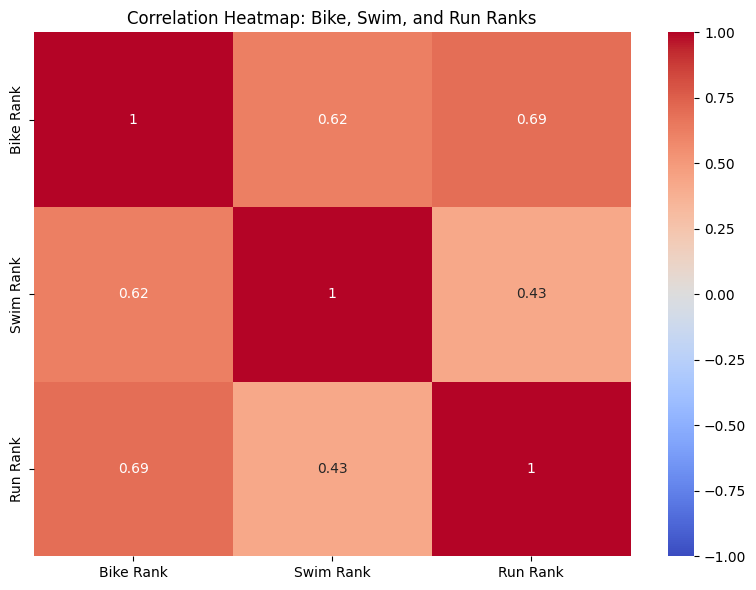

In [11]:



# Create a correlation heatmap
corr = df[['Bike Rank', 'Swim Rank', 'Run Rank']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Bike, Swim, and Run Ranks')
plt.tight_layout()
plt.show()

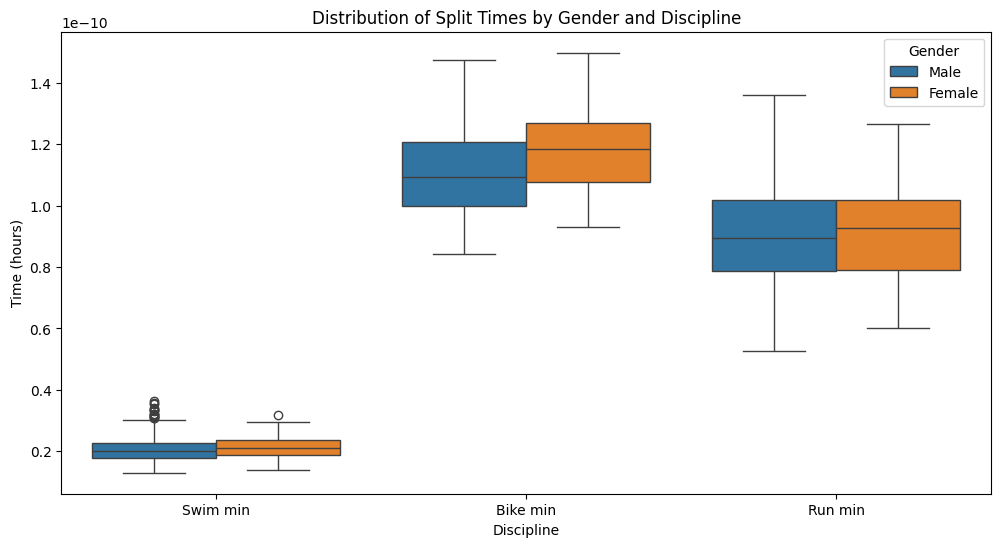

In [13]:
# Box plot of split times by gender
plt.figure(figsize=(12, 6))
df_melt = df.melt(id_vars=['Gender'], value_vars=['Swim min', 'Bike min', 'Run min'], var_name='Discipline', value_name='Time')
df_melt['Time'] = pd.to_timedelta(df_melt['Time']).dt.total_seconds() / 3600  # Convert to hours

sns.boxplot(x='Discipline', y='Time', hue='Gender', data=df_melt)
plt.title('Distribution of Split Times by Gender and Discipline')
plt.ylabel('Time (hours)')
plt.show()